In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Foward Euler
def feuler(odefun, tspan, y, Nh):
    h = (tspan[1] - tspan[0]) / Nh  # tamanho do time step
    tt = np.linspace(tspan[0], tspan[1], Nh+1) # Time step
    
    # Redimensionando y para duas dimensões.
    y = y.reshape((1, -1)) # Isso possibilita a função lidar com um sistema de equações.
    
    for t in tt[1:]:
        y_new = y[-1] + h * odefun(t, y[-1])
        y = np.vstack((y, y_new))
    return tt, y

In [36]:
from scipy.optimize import fsolve

# Backward Euler
def beuler(odefun, tspan, y, Nh):
    h = (tspan[1] - tspan[0]) / Nh # tamanho time step
    tt = np.linspace(tspan[0], tspan[1], Nh+1) # time step
    
    y = y.reshape((1, -1)) 
    print(y)
    
    for t in tt[1:]:
        # Define o sistema de eq
        f = lambda w: w - y[-1] - h * odefun(t, w)
        
        # Resolve o sistema de eq
        w = fsolve(f, y[-1])
        print(w)
        y = np.vstack((y, w))
    
    return tt, y

In [5]:
def fvinc(t, y):
    n = np.size(y)
    f = np.zeros(n)
    
    phix = 2*y[0]
    phiy = 2*y[1]
    phiz = 2*y[2]
    
    H = 2*np.eye(3)
    mass = 1
    
    F1 = 0
    F2 = 0
    F3 = -mass*9.8
    
    xp = np.array(y[3:6])
    
    
    F = np.array([F1, F2, F3])
    G = np.array([phix, phiy, phiz])
    
    lambda_val = (mass * xp.T @ H @ xp + F.T @ G) / (G.T @ G)
    
    f[0:3] = y[3:6]
    
    for k in range(3):
        f[k+3] = (F[k] - lambda_val * G[k]) / mass
    return f


In [29]:
# Condições iniciais
y0 = np.array([0, 1, 0, .8, 0, 1.2])
tspan = [0, 25]

t = np.linspace(tspan[0], tspan[1], 1000000)

In [17]:
# Solução com RK23
sol_RK23 = solve_ivp(fvinc, [tspan[0], tspan[-1]], y0, t_eval=t, method="RK23")


# Solução com RK45
sol_RK45 = solve_ivp(fvinc, [tspan[0], tspan[-1]], y0, t_eval=t)

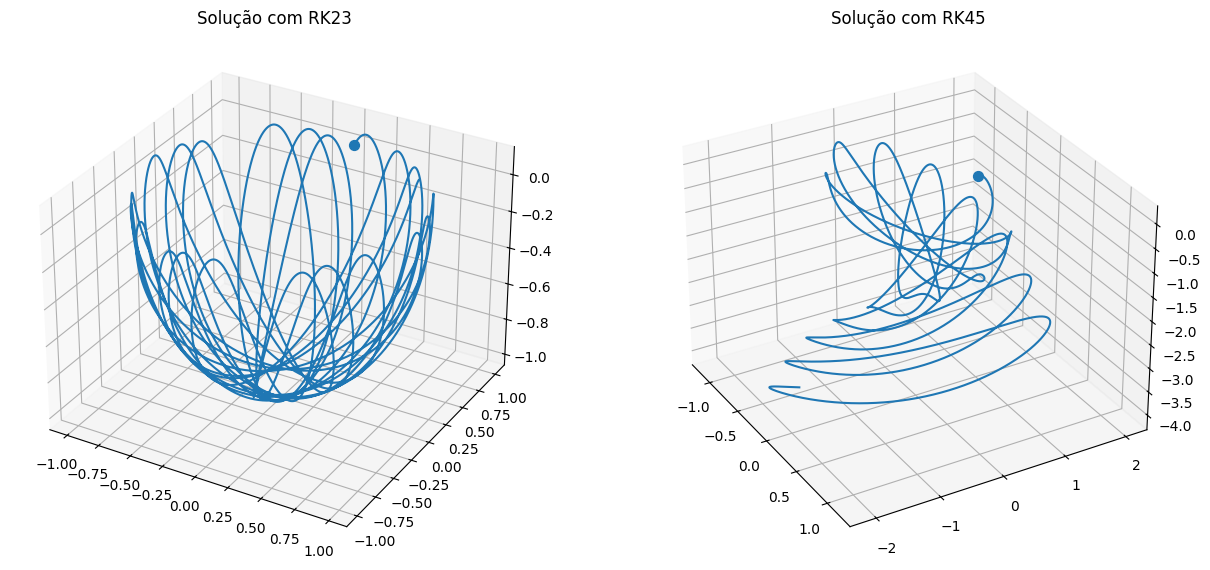

In [19]:
fig = plt.figure(figsize=(15, 8))

# Plot RK23
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(sol_RK23.y[0], sol_RK23.y[1], sol_RK23.y[2])
ax1.set_title("Solução com RK23")
ax1.scatter(y0[0], y0[1], y0[2], s = 50)

# Plot RK45
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(sol_RK45.y[0], sol_RK45.y[1], sol_RK45.y[2])
ax2.set_title("Solução com RK45")
ax2.scatter(y0[0], y0[1], y0[2], s = 50)
ax2.view_init(azim=-30)


plt.show()

In [24]:
# Solution with RK45
sol_RK45 = solve_ivp(fvinc, [tspan[0], tspan[-1]], y0, t_eval=t, rtol = 1e-5)

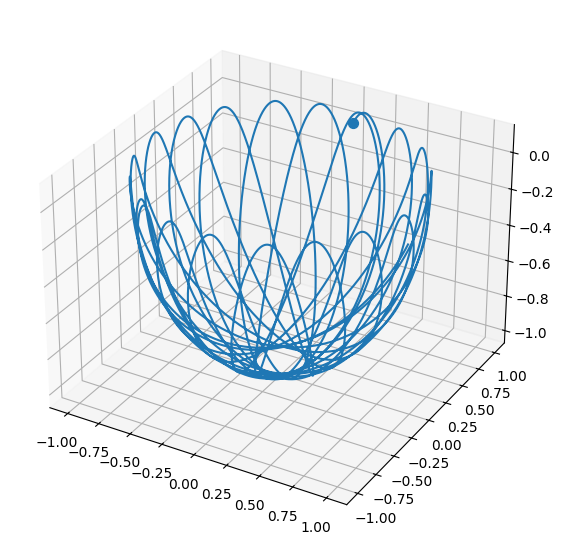

In [26]:
fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(sol_RK45.y[0], sol_RK45.y[1], sol_RK45.y[2])
ax1.scatter(y0[0], y0[1], y0[2], s = 50)
plt.show()

In [11]:
# Soluções com forward Euler
t_FE, sol_FE1 = feuler(fvinc, tspan, y0, 10000)
t_FE, sol_FE2 = feuler(fvinc, tspan, y0, 100000) # demorou consideravelmente mais.


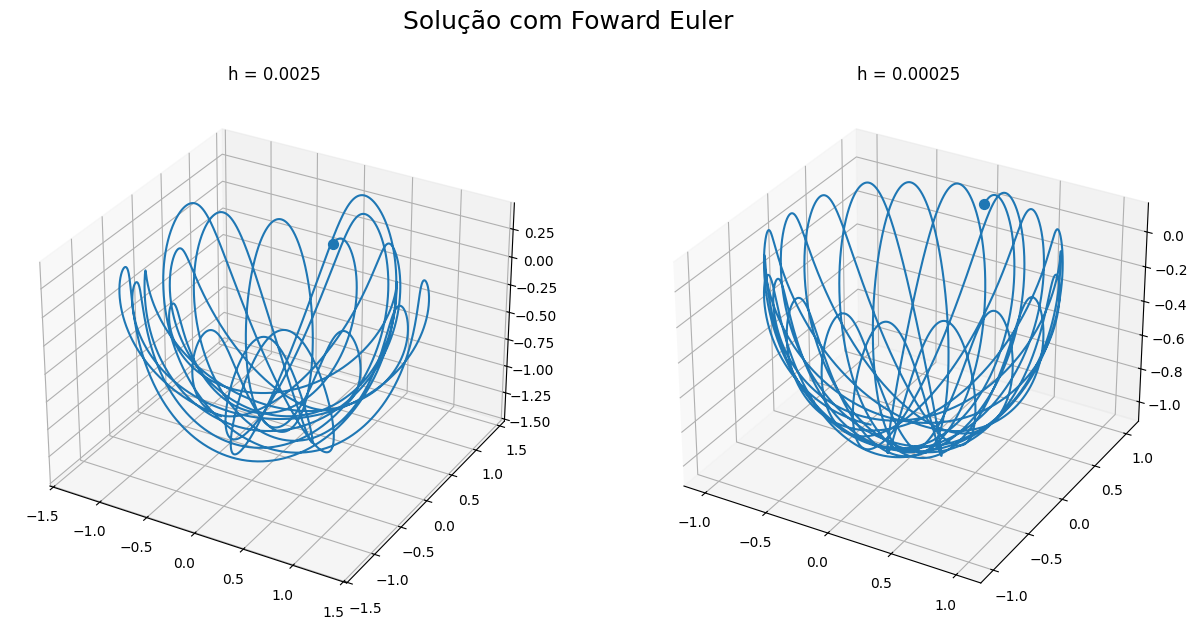

In [27]:

# Plot solution with forward Euler
fig = plt.figure(figsize=(15, 8))
fig.text(0.5, 0.9, 'Solução com Foward Euler ', fontsize = 18,ha='center')

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(sol_FE1[ :, 0], sol_FE1[ :, 1], sol_FE1[ :, 2])
ax1.set_title("h = 0.0025")
ax1.scatter(y0[0], y0[1], y0[2], s=50)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(sol_FE2[ :, 0], sol_FE2[ :, 1], sol_FE2[ :, 2])
ax2.set_title("h = 0.00025")
ax2.scatter(y0[0], y0[1], y0[2], s=50)

plt.show()

In [37]:
# Solução com o backward Euler.
t, Sol_beuler = beuler(fvinc, tspan, y0, 100)

[[0.  1.  0.  0.8 0.  1.2]]
[ 0.16384507  0.71199596 -0.18062876  0.46074211 -1.40500811 -0.84348848]
[ 0.13075313  0.03946073 -0.51217277 -0.40178009 -1.61823306  0.16385458]
[ 0.01152158 -0.13879119 -0.41197011 -0.47692624 -0.71300765  0.40081064]
[-0.04328915 -0.12742112 -0.37146746 -0.21924291  0.04548027  0.16201062]
[-0.0320078  -0.03786487 -0.30783154  0.04512539  0.35822499  0.25454369]
[-0.00299264  0.02159128 -0.23164587  0.07684298  0.11680369  0.38467298]
[ 0.00721097  0.01511167 -0.23247662 -0.00111365 -0.0363619   0.38687149]
[ 0.00207686  0.0013765  -0.2424828  -0.01740625 -0.03797203  0.38246013]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  

C:\Users\eross\AppData\Local\Temp\ipykernel_9904\3155829667.py:16: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  w = fsolve(f, y[-1])
C:\Users\eross\AppData\Local\Temp\ipykernel_9904\3155829667.py:16: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  w = fsolve(f, y[-1])


[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02
 -3.05973268e-02  4.03901597e-01]
[ 7.193405

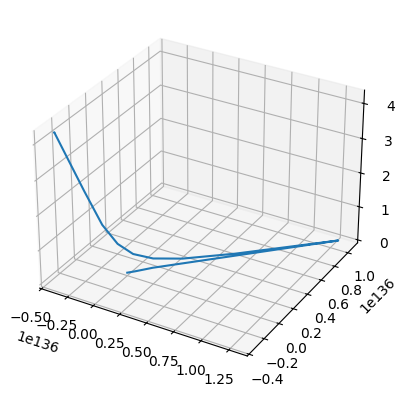

In [144]:
# Plota a solução com o backward Euler

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(Sol_beuler[:,0], Sol_beuler[:,1], Sol_beuler[:,2])
plt.show()

In [156]:
Nh = 100
y = np.array([0, 1, 0, .8, 0, 1.2])
h = (tspan[1] - tspan[0])/Nh
tt = np.linspace(tspan[0], tspan[1], Nh+1) # time step

y = np.reshape(y, (1, -1))

for t in tt[:-1]:
    f = lambda w: w - y[-1] - h * fvinc(t, w)
        
    # Resolve o sistema de eq
    w = fsolve(f, y[-1])
    
    y = np.vstack((y, w))
print(y[:,0:4])
    
        

C:\Users\eross\AppData\Local\Temp\ipykernel_11744\3243241167.py:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  w = fsolve(f, y[-1])
C:\Users\eross\AppData\Local\Temp\ipykernel_11744\3243241167.py:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  w = fsolve(f, y[-1])


[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  8.00000000e-01]
 [ 1.63845069e-01  7.11995958e-01 -1.80628760e-01  4.60742107e-01]
 [ 1.30753135e-01  3.94607258e-02 -5.12172773e-01 -4.01780087e-01]
 [ 1.15215756e-02 -1.38791186e-01 -4.11970114e-01 -4.76926236e-01]
 [-4.32891514e-02 -1.27421119e-01 -3.71467459e-01 -2.19242908e-01]
 [-3.20078038e-02 -3.78648719e-02 -3.07831536e-01  4.51253904e-02]
 [-2.99264475e-03  2.15912777e-02 -2.31645866e-01  7.68429848e-02]
 [ 7.21096964e-03  1.51116700e-02 -2.32476622e-01 -1.11364832e-03]
 [ 2.07685630e-03  1.37650338e-03 -2.42482805e-01 -1.74062482e-02]
 [ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02]
 [ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02]
 [ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02]
 [ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02]
 [ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e-02]
 [ 7.19340591e-04 -1.93196020e-04 -2.45341485e-01 -2.15621871e

np.float64(1.0)

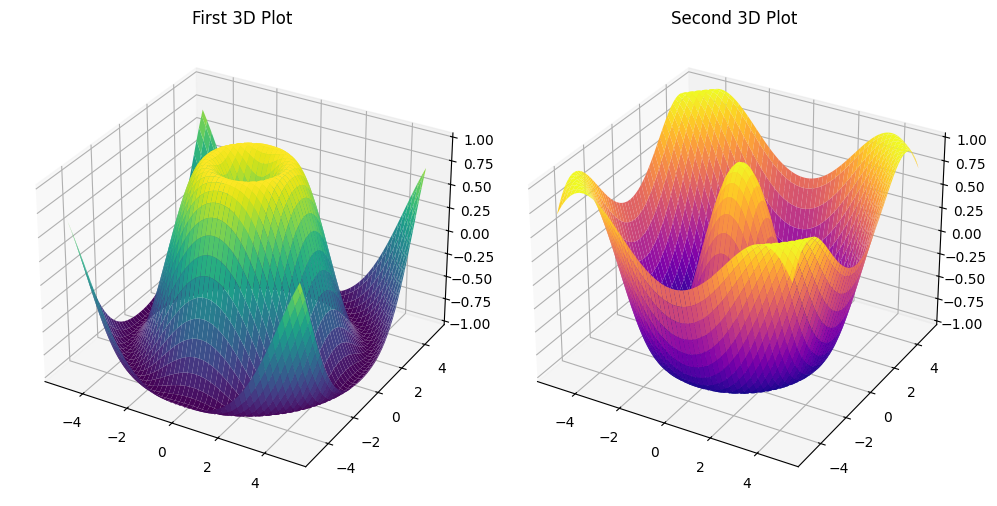

In [174]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Data for the first 3D plot
x1 = np.linspace(-5, 5, 100)
y1 = np.linspace(-5, 5, 100)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = np.sin(np.sqrt(X1**2 + Y1**2))

# Data for the second 3D plot
x2 = np.linspace(-5, 5, 100)
y2 = np.linspace(-5, 5, 100)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = np.cos(np.sqrt(X2**2 + Y2**2))

# Create a figure and axis for the 3D plots
fig = plt.figure(figsize=(10, 5))

# Plot the first 3D plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, Y1, Z1, cmap='viridis')
ax1.set_title('First 3D Plot')

# Plot the second 3D plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X2, Y2, Z2, cmap='plasma')
ax2.set_title('Second 3D Plot')

plt.tight_layout()

# Show the plots
plt.show()